In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib

import os

print(f"Numpy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")

Numpy: 1.24.1
Pandas: 1.5.2
Matplotlib: 3.6.3


In [2]:
class Perceptrion:
    """
    A perceptron classifier
    
    Parameters:
    
        eta: float
            Learning rate (between 0.0 to 1.0)
        n_iter: int
            Passes over the training datasets (epochs)
        random_state: int
            Random number generator seed for random weight initialization
            
    Attributes:
    
        w_: 1d_array
            Weights after fitting
        b_: Scalar
            Bias unit after fitting
        errors_: list
            Number of misclassifications (updates) in each epoch
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """
        Fitting model with training data
        
        Parameters:
        
            X: array, shape = [n_examples, n_features]
                Training vectors, where n_examples is the number of examples and n_features is the number of features
            y: arraym shape = [n_examples]
                Target values.
                
        Returns:
        
            self.object
        """
        
        rgen = np.random.RandomState(self.random_state)
        # Weights initalized from a normal distribution (mean 0. std 0.01) for each feature vector R^m
        # If weights initialized as 0, the model won't get updated as when computing the delta will be 0 thus everything is 0
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                
                #Update weights and bias
                self.w_ += update * xi
                self.b_ += update
                
                errors += int(update != 0.0)
            #Errors per epochs
            self.errors_.append(errors)
        
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        
        # Formula of a single neuron
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        """Return calss label after unit step"""
        
        # outputs > 0.0 = 1, else 0
        return np.where(self.net_input(X) >= 0.0, 1 , 0)

## Getting iris dataset

In [3]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print(f"url: {s}")

url: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [4]:
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Extracting only Iris-setosa & Iris-versicolor

for binary classification where
* 1 = versicolor
* 2 = setosa

In [5]:
# select setosa and veriscolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

#extract sepal length and petal length
X = df.iloc[0:100, [0,2]].values

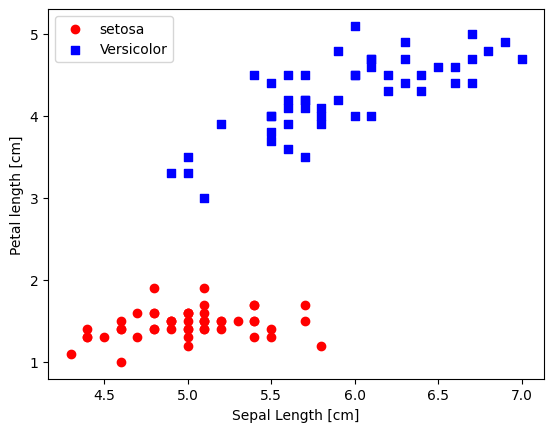

In [6]:
plt.scatter(X[:50, 0], X[:50, 1], c='red', marker='o', label="setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], c='blue', marker='s', label="Versicolor")

plt.xlabel("Sepal Length [cm]")
plt.ylabel("Petal length [cm]")
plt.legend(loc='upper left')
_ = plt.show()

### Initialzing Perceptron object

In [7]:
ppn = Perceptrion(eta=0.1, n_iter=10)
ppn.fit(X, y)

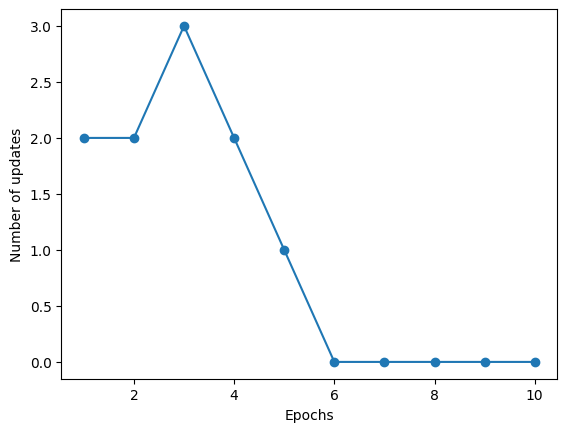

In [8]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
_ = plt.show()

### Plotting decision boundaries

In [9]:
from matplotlib.colors import ListedColormap
 
def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

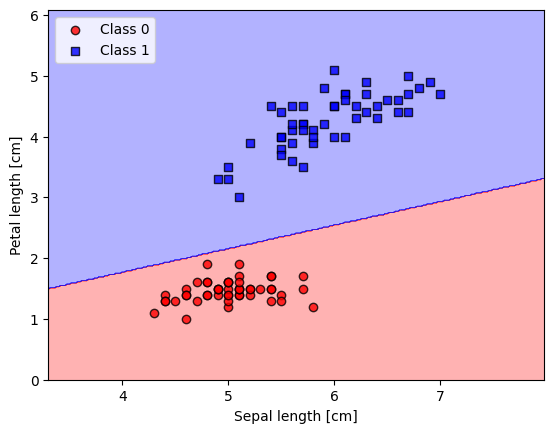

In [10]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()